In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
bronchitis_dataset = pd.read_csv("bronchitis_dataset.csv")

# Check for duplicates
duplicates = bronchitis_dataset.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Check for null values
null_values = bronchitis_dataset.isnull().sum().sum()
print(f"Number of null values: {null_values}")


Number of duplicate rows: 0
Number of null values: 0


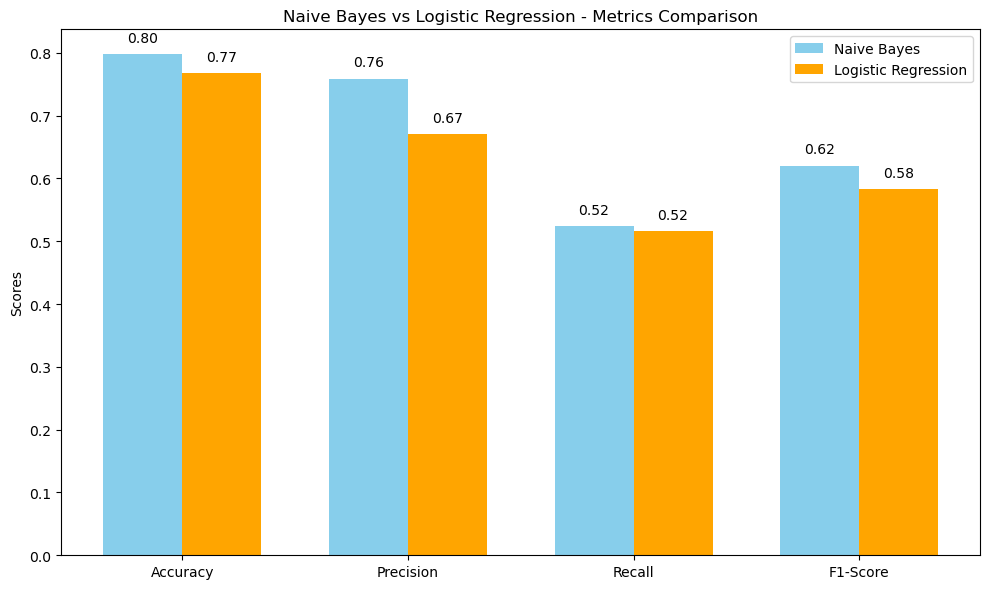

Classification Metrics:
Accuracy: Naive Bayes = 0.7975, Logistic Regression = 0.7675
Precision: Naive Bayes = 0.7586, Logistic Regression = 0.6701
Recall: Naive Bayes = 0.5238, Logistic Regression = 0.5159
F1-Score: Naive Bayes = 0.6197, Logistic Regression = 0.5830


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
dataset = pd.read_csv("bronchitis_dataset.csv")  # Update with your dataset path

# Convert categorical data into numerical values
dataset['Gender'] = dataset['Gender'].map({'Male': 0, 'Female': 1})
dataset['Smoking_Status'] = dataset['Smoking_Status'].map({'Non-Smoker': 0, 'Ex-Smoker': 1, 'Smoker': 2})
dataset['Residence'] = dataset['Residence'].map({'Urban': 0, 'Rural': 1})
dataset['Bronchitis_Present'] = dataset['Bronchitis_Present'].map({'No': 0, 'Yes': 1})

# Handle missing values
dataset = dataset.dropna()

# Select features and target
X = dataset[['Age', 'Gender', 'Smoking_Status', 'AQI', 'PM2.5_Levels', 'Temperature_C', 'Humidity_%', 'Residence']]
y = dataset['Bronchitis_Present']

# Normalize the data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Train Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluation Metrics
metrics_classification = {
    "Accuracy": [accuracy_score(y_test, y_pred_nb), accuracy_score(y_test, y_pred_log_reg)],
    "Precision": [precision_score(y_test, y_pred_nb), precision_score(y_test, y_pred_log_reg)],
    "Recall": [recall_score(y_test, y_pred_nb), recall_score(y_test, y_pred_log_reg)],
    "F1-Score": [f1_score(y_test, y_pred_nb), f1_score(y_test, y_pred_log_reg)],
}

# Plot Classification Metrics
labels = ["Naive Bayes", "Logistic Regression"]
x = np.arange(len(metrics_classification))  # Label locations
bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

# Plot Accuracy, Precision, Recall, F1-Score
ax.bar(x - bar_width/2, [metrics_classification[m][0] for m in metrics_classification], bar_width, label="Naive Bayes", color='skyblue')
ax.bar(x + bar_width/2, [metrics_classification[m][1] for m in metrics_classification], bar_width, label="Logistic Regression", color='orange')

ax.set_xticks(x)
ax.set_xticklabels(metrics_classification.keys())
ax.set_ylabel("Scores")
ax.set_title("Naive Bayes vs Logistic Regression - Metrics Comparison")
ax.legend()

# Annotate bar values
for i, metric in enumerate(metrics_classification):
    ax.text(i - bar_width/2, metrics_classification[metric][0] + 0.02, f"{metrics_classification[metric][0]:.2f}", ha='center', fontsize=10)
    ax.text(i + bar_width/2, metrics_classification[metric][1] + 0.02, f"{metrics_classification[metric][1]:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Print the metrics
print("Classification Metrics:")
for metric, values in metrics_classification.items():
    print(f"{metric}: Naive Bayes = {values[0]:.4f}, Logistic Regression = {values[1]:.4f}")


In [14]:
pip install pandas scikit-learn matplotlib numpy


Note: you may need to restart the kernel to use updated packages.
